In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import prepare as p
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

dataset source kaggle : https://www.kaggle.com/datasets/abhinand05/daily-sun-spot-data-1818-to-2019

In [50]:
# import csv and make date into index from year, month, day columns
sun_spots = pd.read_csv('sunspot_data.csv',index_col=0, parse_dates= {"date" : ["Year","Month","Day"]},na_values=['-1'])

In [51]:
sun_spots.sample(20)

,Unnamed: 0,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
date,,,,,,
1899-06-09,29744,1899.437,43.0,5.9,1,1
1953-04-29,49426,1953.325,81.0,6.0,1,1
1836-11-21,6899,1836.889,NaN,NaN,0,1
1836-10-14,6861,1836.786,NaN,NaN,0,1
1930-11-15,41225,1930.873,23.0,4.3,1,1
1873-06-30,20269,1873.495,122.0,12.4,1,1
2002-04-11,67305,2002.275,235.0,11.0,19,1
1872-10-02,19998,1872.753,270.0,18.5,1,1
1979-10-09,59085,1979.771,297.0,11.5,1,1


In [52]:
sun_spots= pd.DataFrame(sun_spots)

In [53]:
sun_spots.drop(columns={'Unnamed: 0'}, inplace = True)

In [54]:
sun_spots.rename(columns = {'Date In Fraction Of Year':'year_in_fraction','Number of Sunspots':'number_of_sunspots',
                            'Standard Deviation':'std_dev','Observations':'observations','Indicator':'indicator'},
                            inplace = True)

In [55]:
sun_spots.describe()

,year_in_fraction,number_of_sunspots,std_dev,observations,indicator
count,73718.000000,70471.000000,70471.000000,73718.000000,73718.000000
mean,1918.916406,82.946247,7.289718,4.429678,0.998331
std,58.264520,77.252109,4.567518,7.884112,0.040814
min,1818.001000,0.000000,0.000000,0.000000,0.000000
25%,1868.458500,21.000000,3.500000,1.000000,1.000000
50%,1918.917500,63.000000,6.800000,1.000000,1.000000
75%,1969.373250,127.000000,10.200000,1.000000,1.000000
max,2019.832000,528.000000,77.700000,60.000000,1.000000


### Null values under number of sunspots columns are indicated by using a -1 this is about 4.4% of the data and considering diffirent options for dealing with nulls. One is replacing -1 with 0, Another is to just keep the -1 as an indicator of no record

Approach: at csv acquire,set nans to equal -1

In [60]:
sun_spots.isnull().sum()

year_in_fraction         0
number_of_sunspots    3247
std_dev               3247
observations             0
indicator                0
dtype: int64

In [17]:
sun_spots

,date,fraction_date,number_of_sunspots,std,observations,indicator
0,1818-01-01,1818.001,-1,-1.0,0,1
1,1818-01-02,1818.004,-1,-1.0,0,1
2,1818-01-03,1818.007,-1,-1.0,0,1
3,1818-01-04,1818.010,-1,-1.0,0,1
4,1818-01-05,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...
73713,2019-10-27,2019.821,0,0.0,34,0
73714,2019-10-28,2019.823,0,0.0,34,0
73715,2019-10-29,2019.826,0,0.0,30,0
73716,2019-10-30,2019.829,0,0.0,24,0


In [18]:
sun_spots = p.datetime_type(sun_spots,'date')

In [19]:
sun_spots.dtypes

date                  datetime64[ns]
fraction_date                float64
number_of_sunspots             int64
std                          float64
observations                   int64
indicator                      int64
dtype: object

In [20]:
sun_spots = p.set_date_to_index(sun_spots,'date')

In [21]:
sun_spots.observations.value_counts()

1     56288
0      3247
20     1018
18      972
17      938
      ...  
2         3
57        2
58        2
60        2
59        1
Name: observations, Length: 61, dtype: int64

In [22]:
sun_spots.index.value_counts().sort_index()

1818-01-01    1
1818-01-02    1
1818-01-03    1
1818-01-04    1
1818-01-05    1
             ..
2019-10-27    1
2019-10-28    1
2019-10-29    1
2019-10-30    1
2019-10-31    1
Name: date, Length: 73718, dtype: int64

In [23]:
# human-based approach
train = sun_spots[:'2000'] # includes 2016
test = sun_spots['2000':'2019']

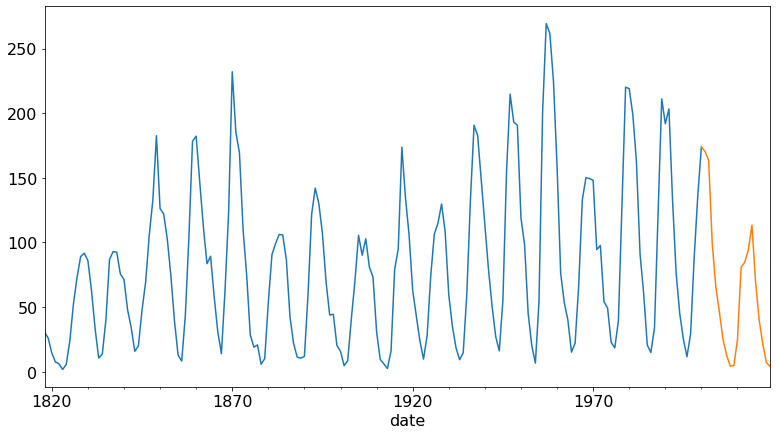

In [24]:
train.resample('Y').number_of_sunspots.mean().plot()
test.resample('Y').number_of_sunspots.mean().plot();

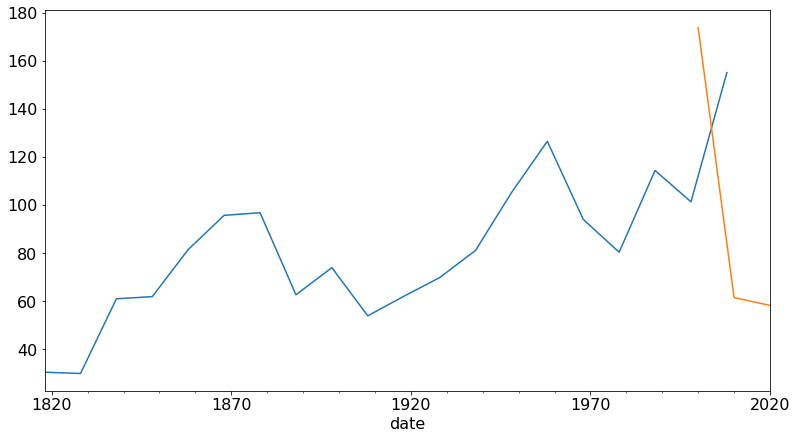

In [25]:
train.resample('10Y').number_of_sunspots.mean().plot()
test.resample('10Y').number_of_sunspots.mean().plot();

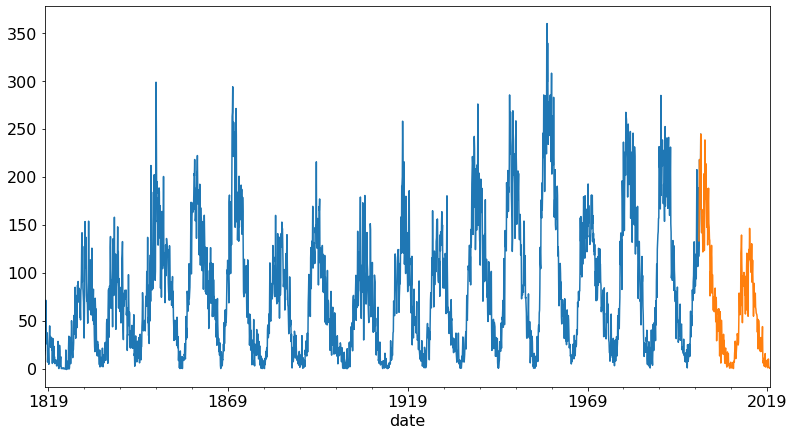

In [26]:
train.resample('M').number_of_sunspots.mean().plot()
test.resample('M').number_of_sunspots.mean().plot();

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

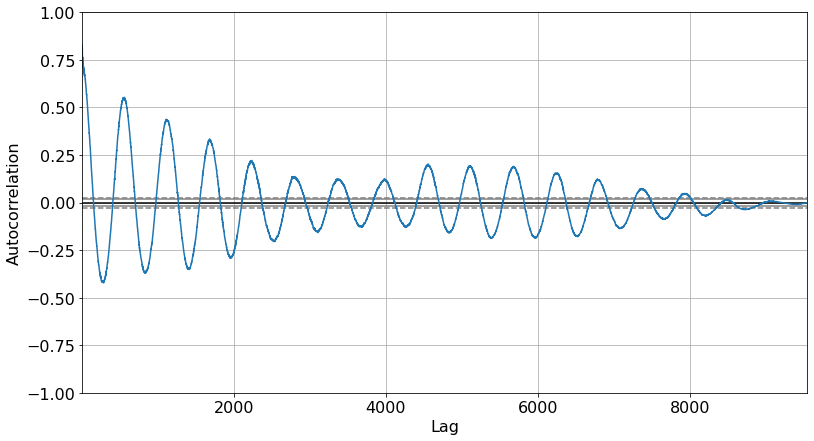

In [27]:
pd.plotting.autocorrelation_plot(train.number_of_sunspots.resample('W').mean())

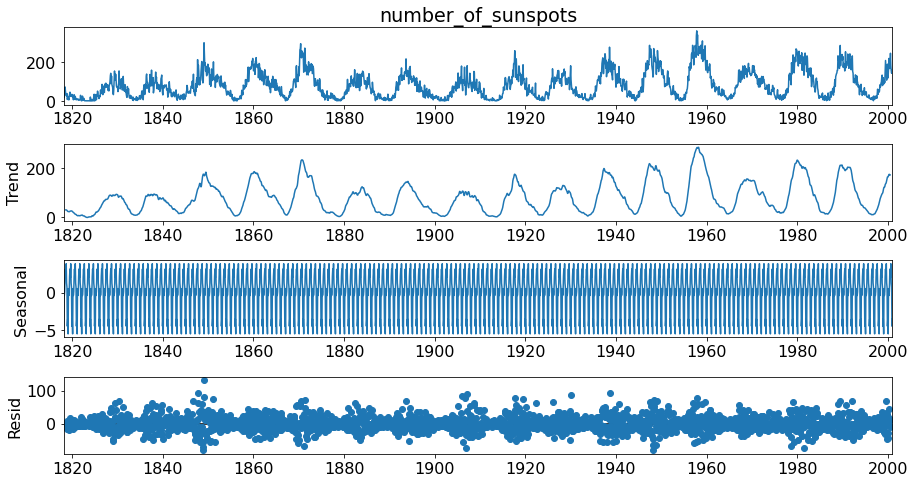

In [28]:
sm.tsa.seasonal_decompose(train.number_of_sunspots.resample('M').mean()).plot()
None


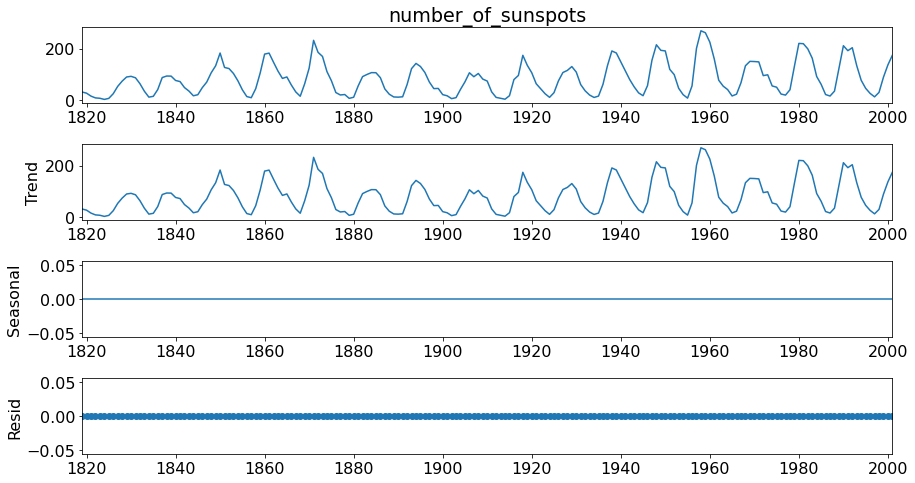

In [29]:
sm.tsa.seasonal_decompose(train.number_of_sunspots.resample('Y').mean()).plot()
None


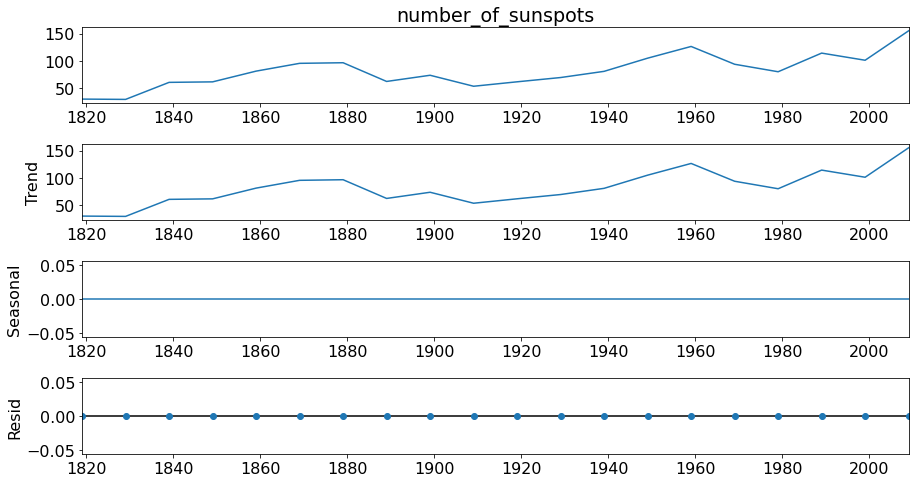

In [30]:
sm.tsa.seasonal_decompose(train.number_of_sunspots.resample('10Y').mean()).plot()
None


In [31]:
y= train.resample('W').number_of_sunspots.mean()
y.head()

date
1818-01-04    -1.000000
1818-01-11     8.428571
1818-01-18    29.714286
1818-01-25    17.857143
1818-02-01     7.571429
Freq: W-SUN, Name: number_of_sunspots, dtype: float64

Text(0, 0.5, 'Difference in sun spots from one week to the next')

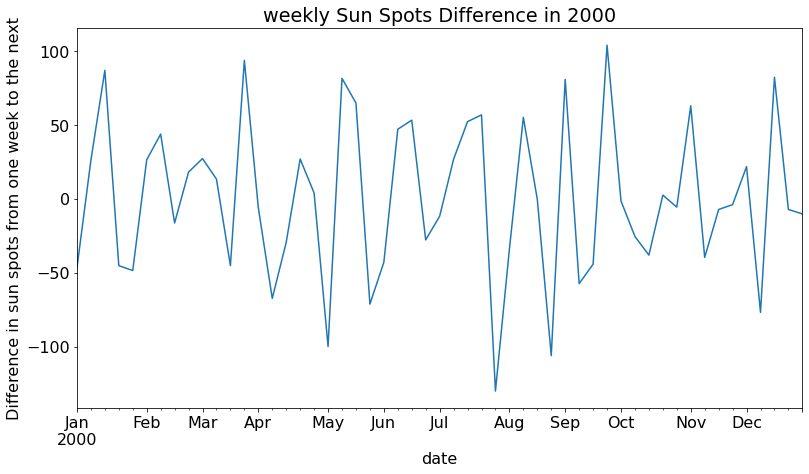

In [32]:
y.diff()['2000'].plot()
plt.title('weekly Sun Spots Difference in 2000')
plt.ylabel('Difference in sun spots from one week to the next')

Text(0, 0.5, 'Difference in sun spots from one week to the next')

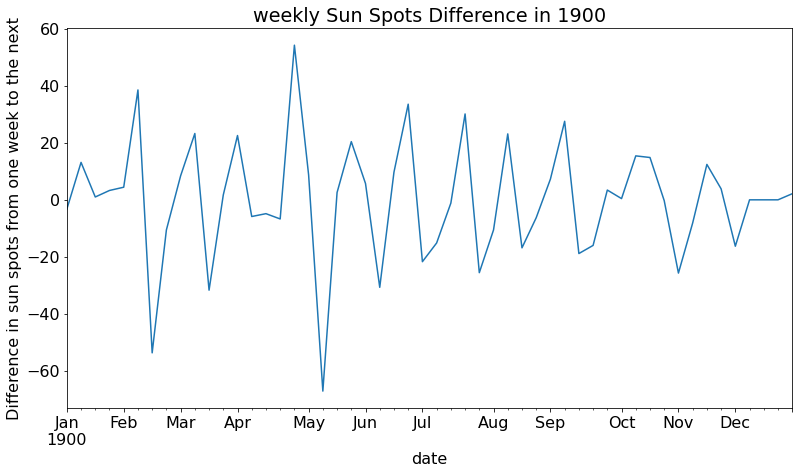

In [33]:
y.diff()['1900'].plot()
plt.title('weekly Sun Spots Difference in 1900')
plt.ylabel('Difference in sun spots from one week to the next')

In [34]:
train.groupby((train.index.year//10)*10).sum()

,fraction_date,number_of_sunspots,std,observations,indicator
date,,,,,
1810,1327870.0,20603,3348.1,462,730
1820,6666723.5,133295,20036.3,2920,3653
1830,6701419.0,216934,23477.3,2266,3652
1840,6739783.5,265272,29718.7,2793,3653
1850,6774459.0,296168,34371.8,3652,3652
1860,6812843.5,329714,37138.1,3653,3653
1870,6847499.0,312190,31831.1,3652,3652
1880,6885903.5,229123,28999.0,3653,3653
1890,6920539.0,273708,27397.4,3652,3652


In [35]:
train['month'] = train.index.month
train['weekday'] = train.index.day_name()
train['year'] = train.index.year
train_decade = train.groupby((train.index.year//10)*10).sum()
train_decade_mean = train.groupby((train.index.year//10)*10).mean()

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3352/4046582266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3352/4046582266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = train.index.day_name()
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_3352/4046582266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [36]:
train

,fraction_date,number_of_sunspots,std,observations,indicator,month,weekday,year
date,,,,,,,,
1818-01-01,1818.001,-1,-1.0,0,1,1,Thursday,1818
1818-01-02,1818.004,-1,-1.0,0,1,1,Friday,1818
1818-01-03,1818.007,-1,-1.0,0,1,1,Saturday,1818
1818-01-04,1818.010,-1,-1.0,0,1,1,Sunday,1818
1818-01-05,1818.012,-1,-1.0,0,1,1,Monday,1818
...,...,...,...,...,...,...,...,...
2000-12-27,2000.988,162,5.2,8,1,12,Wednesday,2000
2000-12-28,2000.990,162,7.0,13,1,12,Thursday,2000
2000-12-29,2000.993,151,11.7,15,1,12,Friday,2000


<AxesSubplot:xlabel='month', ylabel='number_of_sunspots'>

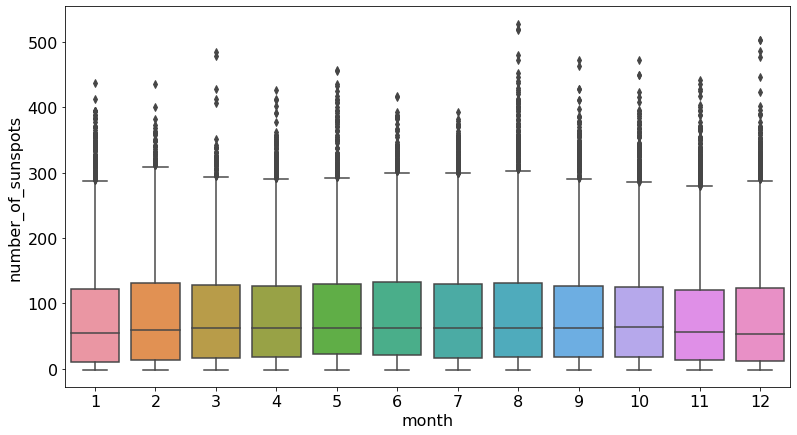

In [40]:
sns.boxplot(data = train, x = 'month', y = 'number_of_sunspots')

<AxesSubplot:xlabel='year', ylabel='number_of_sunspots'>

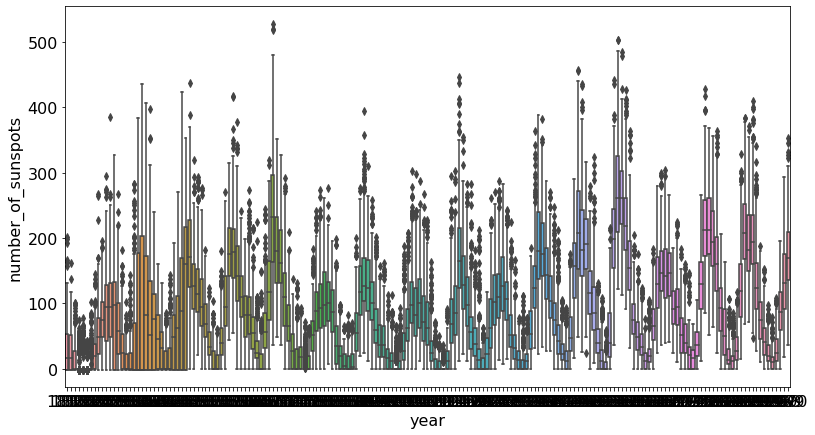

In [38]:
sns.boxplot(data = train, x = 'year', y = 'number_of_sunspots')

In [39]:
sns.boxplot(data = train_decade, x = 'decade', y = 'number_of_sunspots')

ValueError: Could not interpret input 'decade'

In [ ]:
sns.boxplot(data = train_decade_mean, x = 'decade', y = 'number_of_sunspots')

In [ ]:
y = train.number_of_sunspots
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack()

table.head()

In [ ]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [ ]:

fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(25,8))

for ax, (month, subset) in zip(axs.ravel(), table.iteritems()):
    subset.plot(ax=ax, title=month[3:])
    ax.hlines(subset.mean(), *ax.get_xlim(), ls = '--')
fig.subplots_adjust(wspace=0)
plt.tight_layout()


In [ ]:

fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(25,8))

for ax, (year, subset) in zip(axs.ravel(), table.iteritems()):
    subset.plot(ax=ax, title=month[3:])
    ax.hlines(subset.mean(), *ax.get_xlim(), ls = '--')
fig.subplots_adjust(wspace=0)
plt.tight_layout()


In [ ]:
y2 = train.number_of_sunspots
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack()

table.head()

In [ ]:
ax = train['2000'].number_of_sunspots.resample('M').sum().plot()
ax.set(title = 'Sun spots pattern')

In [ ]:
ax = train['1900'].number_of_sunspots.resample('M').sum().plot()
ax.set(title = 'Sun spots pattern')

In [ ]:
train[['number_of_sunspots']].resample('10Y').sum().sort_values(by='number_of_sunspots')

In [ ]:
train[['number_of_sunspots']].resample('Y').sum().sort_values(by='number_of_sunspots')

In [ ]:
train[['number_of_sunspots']].resample('10Y').mean().sort_values(by='number_of_sunspots')